In [172]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [173]:
def rotate_point(origin, point, angle):

    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)

    return int(qx), int(qy)

# Node detection kernel, generates feature to detect inside sliding window
def node_detect(win, feature, angle=0, thickness=1):

    # Check that feature is correctly specified
    assert feature in ("cross", "tee", "elbow", "end"), "Feature must be one of 'cross', 'tee', 'elbow', or 'end'."

    # Convert angle to radians
    angle = np.deg2rad(angle)
    
    # Create kernel matrix, if end feature is selected, generate end-detector mask
    kernel = np.zeros((win, win), np.uint8)
    if feature == "end":
        end_mask = np.zeros((win, win), np.uint8)

    # Define center of kernel
    center = win // 2
    origin = (center, center)

    # Draw Top
    if feature in ("cross", "tee", "end"):
        endpoint = rotate_point(origin, (center, 1), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Draw Bottom
    if feature == "cross":
        endpoint = rotate_point(origin, (center, win-1), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Draw Left 
    if feature in ("cross", "tee"):
        endpoint = rotate_point(origin, (1, center), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Draw Right 
    if feature in ("cross", "tee", "elbow"):
        endpoint = rotate_point(origin, (win-1, center), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Draw end mask, if applicable
    if feature == "end":
        endpoint = rotate_point(origin, (center, win-1), angle)
        cv2.line(end_mask, endpoint, endpoint, (1, 1, 1), thickness)
        
    if feature == "end":
        return kernel, end_mask
    else:
        return kernel

In [174]:
window = 16
radius = -(-window//2)

In [175]:
kernel, end_mask = node_detect(window, feature="end", angle=0)
#kernel2 = node_detect(window, feature="end", angle=35, thickness=2)

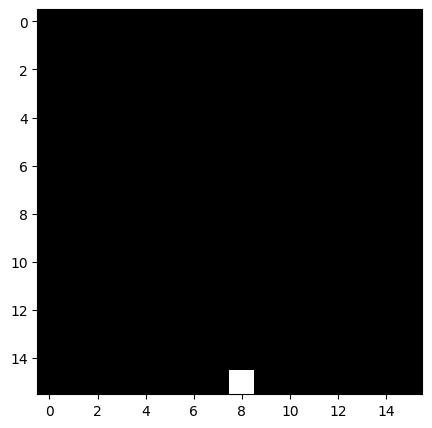

In [176]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(end_mask, cmap='gray')

In [177]:
# flip_kernel = kernel

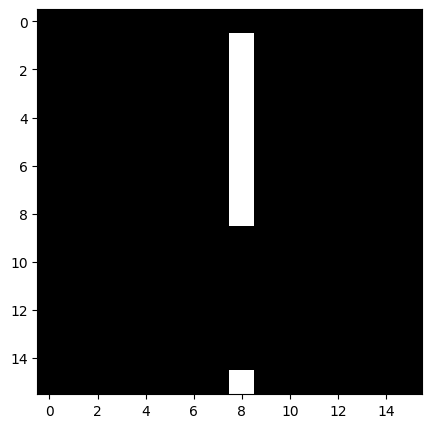

In [178]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(kernel.astype(np.int16)+end_mask.astype(np.int16), cmap='gray')

In [179]:

np.array_equal(kernel*kernel2, kernel)

False

In [180]:
a = 5
b = a

In [181]:
b

5

In [182]:
a

5